In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

In [75]:
data=pd.read_csv('spam.csv',encoding='latin-1')

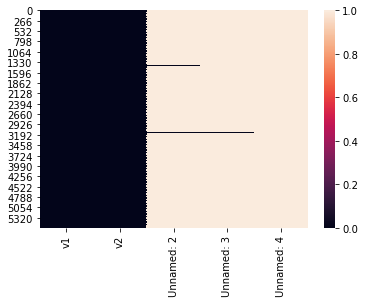

In [76]:
sns.heatmap(data.isnull())

In [77]:
data.shape

(5572, 5)

In [78]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [79]:
drops=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
data.drop(columns=drops,inplace=True)

In [80]:
data.columns=['Type','Message']
data.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
def clean(data):
    x=data['Message']
    rr='[^a-zA-Z]'
    clean_data=[]
    for i in range(len(x)):
        string=x[i]
        string=re.sub(rr,' ',string)
        string=string.lower()
        string=string.split()
        string=[lem.lemmatize(word) for word in string if word not in stopwords.words('english')]
        string=' '.join(string)
        clean_data.append(string)
    return pd.DataFrame(clean_data)
    
    
a=clean(data.copy())

In [60]:
a

,0
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st ...
3,u dun say early hor u c already say
4,nah think go usf life around though
...,...
5567,nd time tried contact u u pound prize claim ea...
5568,b going esplanade fr home
5569,pity mood suggestion
5570,guy bitching acted like interested buying some...


In [81]:
data=pd.concat([data,a],axis=1)


In [82]:
data

,Type,Message,0
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [84]:
data=data.drop(columns='Message')

In [87]:
data=data.rename(columns={0:'Message'})

In [88]:
data.head()

,Type,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though
